In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


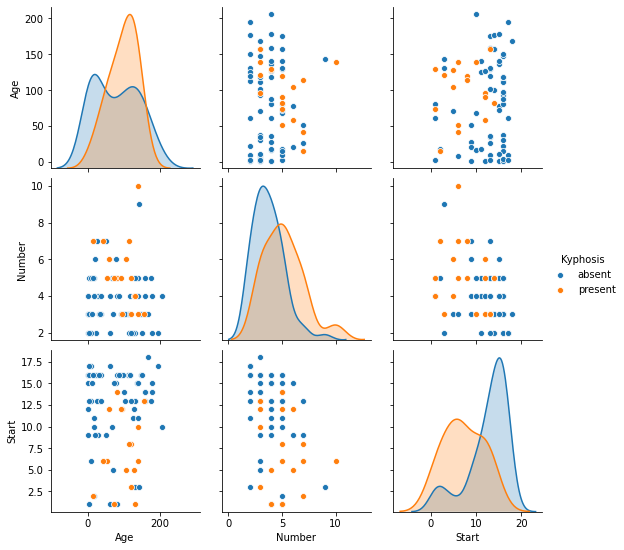

In [3]:
sns.pairplot(df,hue = 'Kyphosis')

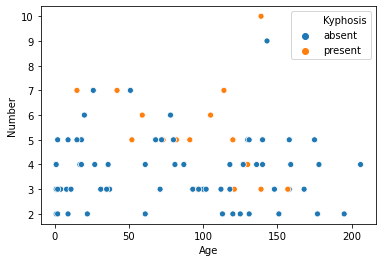

In [4]:
sns.scatterplot(x = 'Age', y = 'Number',data = df, hue  = 'Kyphosis')

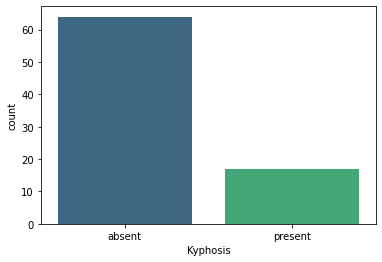

In [5]:
sns.countplot(x = 'Kyphosis',data = df,palette='viridis')

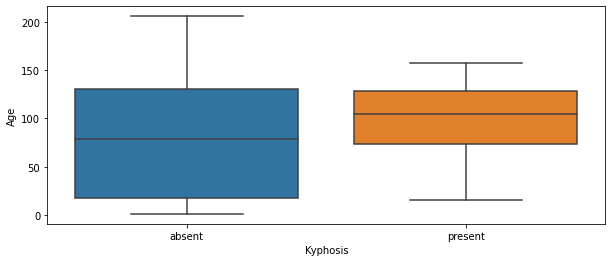

In [6]:
fig = plt.figure(figsize=(10,4))
sns.boxplot(x = 'Kyphosis',y ='Age',data = df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0B3A0FB20>,
      dtype=object)

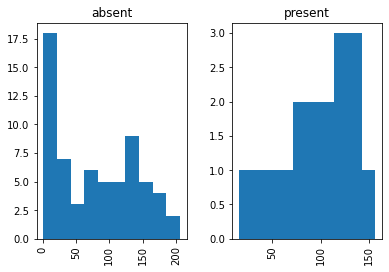

In [7]:
df.hist(column='Age', by =  'Kyphosis',)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
pred = dtree.predict(X_test)
pred

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

In [15]:
y_test

33     absent
61    present
21    present
32     absent
20     absent
13     absent
52    present
25     absent
22    present
27     absent
30     absent
2     present
67     absent
16     absent
69     absent
6      absent
53     absent
14     absent
48    present
46     absent
26     absent
50     absent
3      absent
37    present
79    present
Name: Kyphosis, dtype: object

In [16]:
from sklearn import metrics


In [17]:
metrics.classification_report(y_test,pred,output_dict=True)

{'absent': {'precision': 0.6842105263157895,
  'recall': 0.7647058823529411,
  'f1-score': 0.7222222222222222,
  'support': 17},
 'present': {'precision': 0.3333333333333333,
  'recall': 0.25,
  'f1-score': 0.28571428571428575,
  'support': 8},
 'accuracy': 0.6,
 'macro avg': {'precision': 0.5087719298245614,
  'recall': 0.5073529411764706,
  'f1-score': 0.503968253968254,
  'support': 25},
 'weighted avg': {'precision': 0.5719298245614035,
  'recall': 0.6,
  'f1-score': 0.5825396825396826,
  'support': 25}}

In [18]:
metrics.confusion_matrix(y_test,pred)

array([[13,  4],
       [ 6,  2]], dtype=int64)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=200)  #estimators  = no of trees

In [21]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
pred = rf.predict(X_test)
pred

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [23]:
y_test

33     absent
61    present
21    present
32     absent
20     absent
13     absent
52    present
25     absent
22    present
27     absent
30     absent
2     present
67     absent
16     absent
69     absent
6      absent
53     absent
14     absent
48    present
46     absent
26     absent
50     absent
3      absent
37    present
79    present
Name: Kyphosis, dtype: object

In [24]:
metrics.classification_report(y_test,pred,output_dict=True)

{'absent': {'precision': 0.7391304347826086,
  'recall': 1.0,
  'f1-score': 0.85,
  'support': 17},
 'present': {'precision': 1.0, 'recall': 0.25, 'f1-score': 0.4, 'support': 8},
 'accuracy': 0.76,
 'macro avg': {'precision': 0.8695652173913043,
  'recall': 0.625,
  'f1-score': 0.625,
  'support': 25},
 'weighted avg': {'precision': 0.8226086956521739,
  'recall': 0.76,
  'f1-score': 0.706,
  'support': 25}}

In [25]:
metrics.confusion_matrix(y_test,pred)

array([[17,  0],
       [ 6,  2]], dtype=int64)

In [26]:
#you can see Random forecast accuracy is much better than that of Decision Tree
